**From uper Menu choose:**
---
Runtime --> Change runtime type:
---
change Hardare accelerator to (gpu)

In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(type(train_images))
print(train_images.shape)
print(train_images[251].shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(28, 28)


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [4]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
print(train_data.shape)

784
(60000, 784)


#convert data to float and scale values between 0 and 1

In [5]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#scale data

In [6]:
#train_data /=255.0
#test_data /=255.0

change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [7]:
train_labels_one_hot = to_categorical(train_labels)


test_labels_one_hot = to_categorical(test_labels)

In [8]:
print(train_labels_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#creating network

In [9]:
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(dimData,)))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


# Compile model

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 5. Run the same code without scaling the images, how the accuracy changes?
---
* without scaling :

235/235 [==============================] - 15s 6ms/step - loss: 1.4895 - accuracy: 0.6081 - val_loss: 0.3592 - val_accuracy: 0.9143

---
* with scaling :

235/235 [==============================] - 2s 7ms/step - loss: 1.7816 - accuracy: 0.4098 - val_loss: 0.4346 - val_accuracy: 0.8955



# Fit model

In [12]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1, validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 15s 6ms/step - loss: 1.4895 - accuracy: 0.6081 - val_loss: 0.3592 - val_accuracy: 0.9143
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3320 - accuracy: 0.9153 - val_loss: 0.2697 - val_accuracy: 0.9270
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2533 - accuracy: 0.9288 - val_loss: 0.2334 - val_accuracy: 0.9325
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2344 - accuracy: 0.9325 - val_loss: 0.2155 - val_accuracy: 0.9370
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2076 - accuracy: 0.9385 - val_loss: 0.2071 - val_accuracy: 0.9379
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1995 - accuracy: 0.9406 - val_loss: 0.1873 - val_accuracy: 0.9448
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1832 - accuracy: 0.9438 - val_loss: 0.1856 - val_accuracy: 0.9439
Epoch

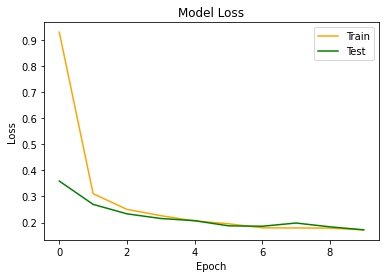

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],c='orange')
plt.plot(history.history['val_loss'], c='green')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

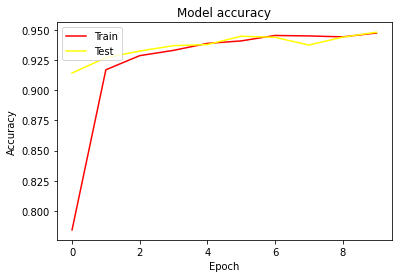

In [14]:
plt.plot(history.history['accuracy'], c='red')
plt.plot(history.history['val_accuracy'], c='yellow')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

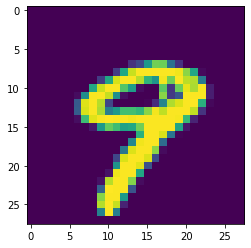

In [15]:
# plt.imshow(test_data[0].reshape([28,28])) # test_images.reshape(test_images.shape[0],dimData)
plt.imshow(test_images[9])

In [16]:
res = model.predict(test_data[9:10])
print("The predicted image for test data is", res)

The predicted image for test data is [[8.4110157e-05 4.2253814e-05 4.2353946e-05 1.6932357e-04 1.1822089e-02
  2.4861100e-04 3.3902825e-06 1.8483601e-03 1.0388863e-03 9.8470068e-01]]


In [17]:
#print(res)
print(res.argmax()) # Returns the indices of the maximum values along an axis.

9


convert the model to API model

In [18]:
from keras.models import Model
from keras.layers import Input

i = Input(shape=(784,))
x = Dense(256, activation='relu')(i)
x = Dense(128, activation='relu')(x)
x = Dense(10, activation='sigmoid')(x)
modell = Model(inputs=i,outputs=x)

#compile
modell.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
#fit the model
history1 = modell.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1, validation_data=(test_data, test_labels_one_hot))

Epoch 1/5
235/235 [==============================] - 2s 5ms/step - loss: 8.1524 - accuracy: 0.7977 - val_loss: 0.8387 - val_accuracy: 0.9077
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.5326 - accuracy: 0.9323 - val_loss: 0.5171 - val_accuracy: 0.9306
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2781 - accuracy: 0.9525 - val_loss: 0.4138 - val_accuracy: 0.9346
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1695 - accuracy: 0.9631 - val_loss: 0.3527 - val_accuracy: 0.9430
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1189 - accuracy: 0.9719 - val_loss: 0.3197 - val_accuracy: 0.9524


In [20]:
#API model summary
modell.summary() 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


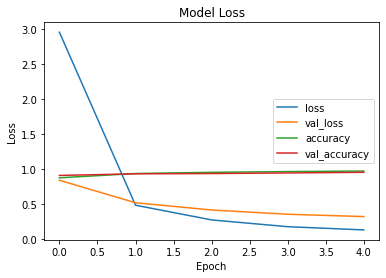

In [21]:
#plot the API model
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'], loc='right')
plt.show()